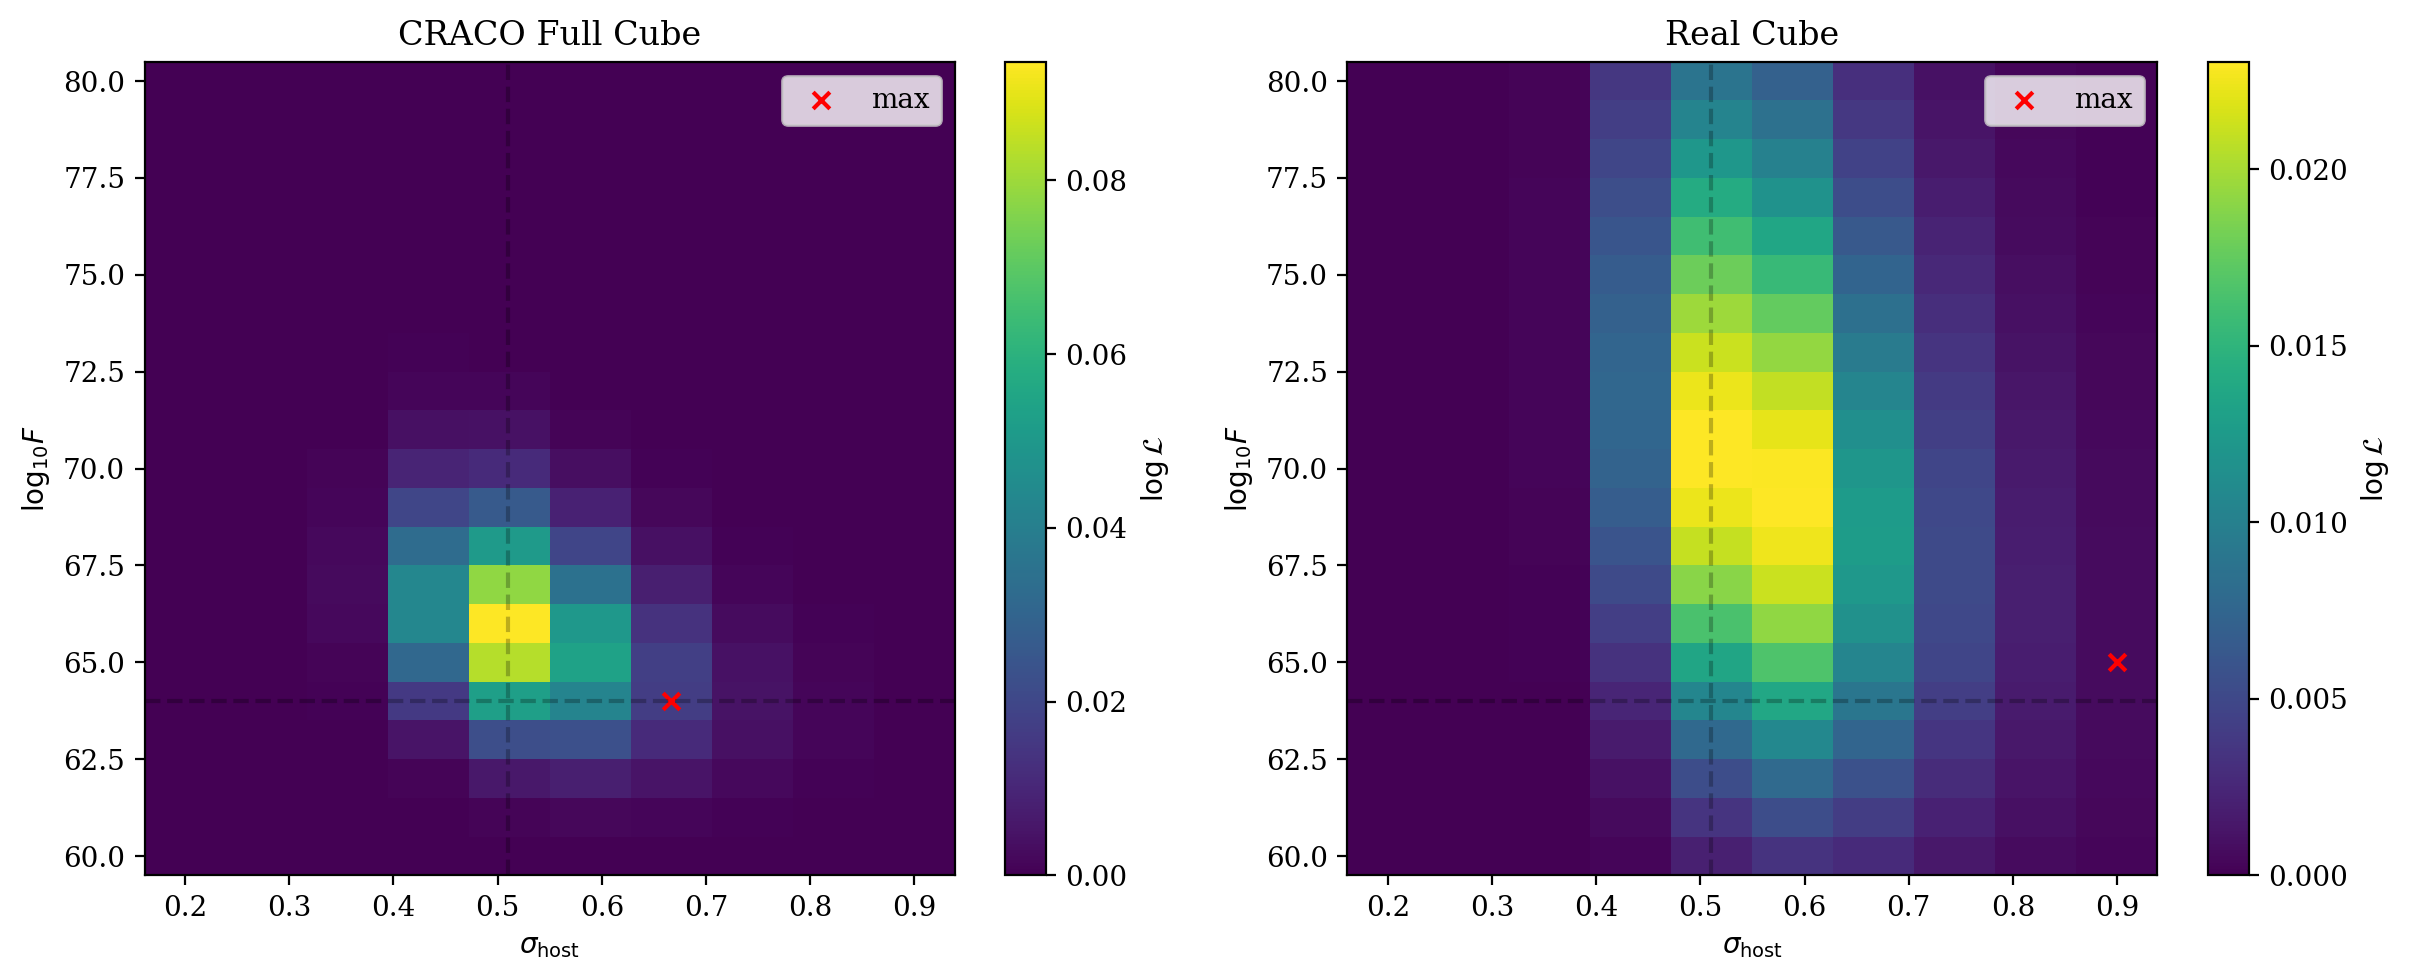

In [3]:
import numpy as np
import zdm.analyze_cube as ac
import matplotlib.pyplot as plt
import zdm.analyze_cube as ac

cube_dir_real  = "./Cubes/craco_real_cube.npz"
cube_dir_full  = "../CRACO/Cubes/craco_full_cube.npz"

cube_real = np.load(cube_dir_real)
cube_full = np.load(cube_dir_full)

lls_real = ac.get_slice_from_parameters(cube_real, ["logF", "lmean"], [-.49, 2.16], verbose=False, wanted="ll")
lls_full = ac.get_slice_from_parameters(cube_full, ["logF", "lmean"], [-.49, 2.16], verbose=False, wanted="ll")

lls_real -= np.max(lls_real)
lls_real = 10**lls_real
lls_real /= np.sum(lls_real)

lls_full -= np.max(lls_full)
lls_full = 10**lls_full
lls_full /= np.sum(lls_full)

sigmas, H0s = np.meshgrid(cube_real["lsigma"], cube_real["H0"])

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(12,5))

f_full = ax[0].pcolormesh(sigmas, H0s, lls_full, shading="nearest")
ax[0].set_xlabel(r"$\sigma_\mathrm{host}$")
ax[0].set_ylabel(r"$\log_{10} F$")
max_idx_i, max_idx_j = np.where(lls_full == lls_full.max())
ax[0].scatter(cube_real["lsigma"][max_idx_i], cube_real["H0"][max_idx_j], c='red', marker='x', label="max")
ax[0].legend()
ax[0].axhline(64, c='k', ls='--', alpha=.25)
ax[0].axvline(0.51, c='k', ls='--', alpha=.25)
ax[0].set_title("CRACO Full Cube")
plt.colorbar(f_full, label=r"$\log \mathcal{L}$", ax=ax[0])

f_real = ax[1].pcolormesh(sigmas, H0s, lls_real, shading="nearest")
ax[1].set_xlabel(r"$\sigma_\mathrm{host}$")
ax[1].set_ylabel(r"$\log_{10} F$")
max_idx_i, max_idx_j = np.where(lls_real == lls_real.max())
ax[1].scatter(cube_real["lsigma"][max_idx_i], cube_real["H0"][max_idx_j], c='red', marker='x', label="max")
ax[1].legend()
ax[1].axhline(64, c='k', ls='--', alpha=.25)
ax[1].axvline(0.51, c='k', ls='--', alpha=.25)
ax[1].set_title("Real Cube")

fig.tight_layout()
plt.colorbar(f_real, label=r"$\log \mathcal{L}$")
plt.show()